In [1]:
import numpy as np
from numpy import genfromtxt

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from qiskit.tools.jupyter import *
from scipy.optimize import minimize
import matplotlib as mpl
import matplotlib.pylab as pylab
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings

warnings.filterwarnings('ignore')

In [2]:
num_series = 6
num_sample = 16
files = ['ramsey_exp_data_6325908a3eb5cf7387bd2132_1to6.csv', 'ramsey_exp_data_632590ad70890acdaf24668d_7to12.csv',
         'ramsey_exp_data_632590c418355847477808ae_13to18.csv', 'ramsey_exp_data_632590ddebe2612625eef605_19to24.csv',
         'ramsey_exp_data_632590f50d4167f849087374_25to30.csv']

In [3]:
data = []
for file in files:
    for d in genfromtxt(file, delimiter=",")[3:, 0]:
        data.append(d)
np.shape(data)

(480,)

In [4]:
def get_position(i, j):
    n = i + num_sample*j
    return n

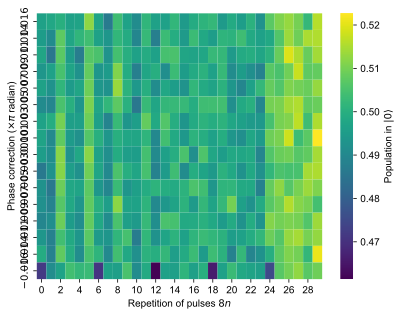

In [5]:
zero_population_exp = np.zeros([num_sample, 30])
for i in range(num_sample):
    for j in range(30):
        zero_population_exp[i, j] = data[get_position(i, j)]
sns.heatmap(np.flipud(zero_population_exp), cbar_kws={'label': 'Population in $|0 \\rangle$'}, cmap="viridis")

sns.set(rc={'figure.figsize':(10,20), 'text.usetex':'True'})
y_ticks_num = np.flip(np.linspace(-1/64, 1/64, num_sample))
y_ticks_label = ['$' + str(np.round(num, 3)) + '$' for num in y_ticks_num]
plt.yticks(plt.yticks()[0], y_ticks_label)
plt.xlabel('Repetition of pulses $8n$')
plt.ylabel('Phase correction ($\\times \pi$ radian)')
plt.show()

In [ ]:
from sympy import *
from sympy.physics.quantum.dagger import Dagger
import numpy as np

population_zero = []
population_one = []
population_two = []

first_excited = np.array([
    [0], [1], [0]
])

second_excited = np.array([
    [0], [0], [1]
])

def RX01(theta, epsilon):
    Rotation = np.array([
        [cos((theta+epsilon)/2), -1j*sin((theta+epsilon)/2), 0],
        [-1j*sin((theta+epsilon)/2), cos((theta+epsilon)/2), 0],
        [0, 0, 1]
    ])
    return Rotation

integer = 48
repetitions = 2*integer+1
d_range = np.linspace(1, repetitions, repetitions)
epsilon = 0

for d in range(repetitions):
    initial_state = np.array([[1], [0], [0]])
    Unitary = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    for j in range(d+1):
        Unitary = RX01(pi/2, epsilon) @ Unitary
    final_state = Unitary@initial_state
    population_zero.append(np.absolute(final_state[0])**2)
    population_one.append(np.absolute(final_state[1])**2)
    population_two.append(np.absolute(final_state[2])**2)

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (11, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)   

import matplotlib.pyplot as plt
plt.plot(d_range, population_zero, '--b', label=r'$P_{|0\rangle}$')
# plt.plot(d_range, population_one, '--', color='orange', label=r'$P_{|1\rangle}$')
plt.plot(d_range, population_zero_exp, 'bs', label=r'$\tilde{P}_{|0\rangle}$')
# plt.plot(d_range, population_one_exp, 'ro', label=r'$\tilde{P}_{|1\rangle}$')
# plt.plot(d_range, population_two, 'g*', label=r'$P_{|2\rangle}$')
plt.legend(fontsize=15)
plt.xlabel(r"# of iteration of $\tilde{X}$, $\epsilon$ = %f" % (epsilon), fontsize=15)
plt.ylabel(r"Probabilities",fontsize=15)
# plt.xlim(0, 20)
# plt.savefig('StartTc.png',dpi=128)
plt.show()